In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [6]:
df1 = df.drop('User ID',axis = 1)

In [8]:
df1

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [9]:
df2 = pd.get_dummies(df1,drop_first=True)

In [10]:
df2

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [12]:
df2.describe()

,Age,EstimatedSalary,Purchased,Gender_Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

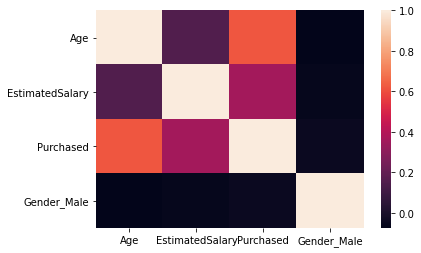

In [14]:
sns.heatmap(df2.corr())

<AxesSubplot:xlabel='Gender_Male', ylabel='count'>

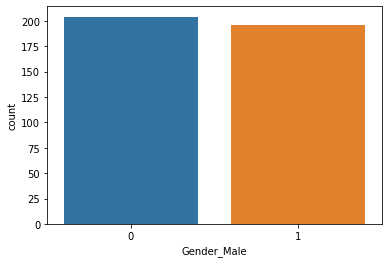

In [15]:
sns.countplot(df2.Gender_Male)

<AxesSubplot:xlabel='EstimatedSalary'>

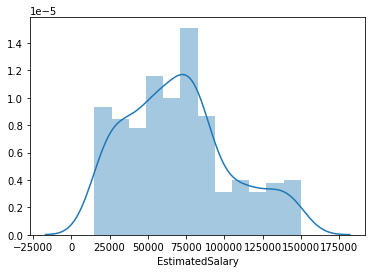

In [16]:
sns.distplot(df2.EstimatedSalary)

In [33]:
from sklearn.preprocessing import StandardScaler,power_transform

In [18]:
std = StandardScaler()

In [22]:
std1 = std.fit_transform(df2[['EstimatedSalary']])

<AxesSubplot:>

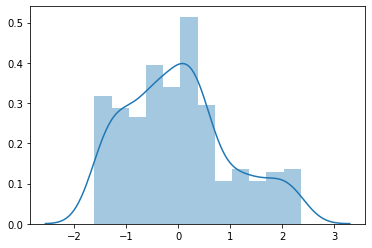

In [23]:
sns.distplot(std1)

In [24]:
from scipy import stats

In [25]:
d = stats.boxcox(df2.EstimatedSalary)

In [27]:
d

(array([201.64635245, 206.52462012, 294.86491606, 336.09139243,
        384.0770029 , 338.81509146, 402.3205288 , 526.30675144,
        260.73501629, 357.21045259, 393.32170974, 322.06999735,
        406.73337712, 196.62766503, 397.85069086, 393.32170974,
        229.14245366, 233.36396344, 241.55201168, 245.52789124,
        215.90129789, 313.30587504, 288.41237815, 215.90129789,
        220.41742458, 206.52462012, 241.55201168, 249.43055593,
        294.86491606, 196.62766503, 379.35622994, 504.67008567,
        186.11838179, 298.03056021, 415.39609731, 237.49885269,
        241.55201168, 313.30587504, 374.56618941, 253.2637292 ,
        191.45635903, 319.17964415, 452.02035424, 180.59740891,
        402.3205288 , 206.52462012, 391.0343302 , 327.76216445,
        501.24461964, 413.25019645, 257.03083208, 298.03056021,
        400.09286504, 220.41742458, 338.81509146, 330.56566001,
        310.32050915, 391.0343302 , 196.62766503, 469.09771041,
        206.52462012, 408.91906832, 359.

In [36]:
pt = power_transform(df[['EstimatedSalary']])

<AxesSubplot:>

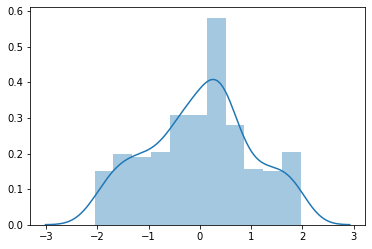

In [37]:
sns.distplot(pt)

In [42]:
est = pd.DataFrame(pt,columns=['sal'])

In [45]:
df5 = pd.concat([est,df2],axis = 1)

In [48]:
df5 = df5.drop('EstimatedSalary',axis = 1)

In [49]:
df5

,sal,Age,Purchased,Gender_Male
0,-1.809251,19,0,1
1,-1.752548,35,0,1
2,-0.725702,26,0,0
3,-0.246494,27,0,0
4,0.311281,19,0,1
...,...,...,...,...
395,-0.800705,46,1,0
396,-1.591062,51,1,1
397,-1.752548,50,1,0
398,-1.122420,36,0,1


In [52]:
age = std.fit_transform(df5[['Age']])

In [58]:
age = pd.DataFrame(age,columns=['age'])

In [59]:
df5 = pd.concat([age,df5],axis = 1)

In [62]:
df5 = df5.drop('age',axis = 1)

In [63]:
df5

,0,sal,Purchased,Gender_Male
0,-1.781797,-1.809251,0,1
1,-0.253587,-1.752548,0,1
2,-1.113206,-0.725702,0,0
3,-1.017692,-0.246494,0,0
4,-1.781797,0.311281,0,1
...,...,...,...,...
395,0.797057,-0.800705,1,0
396,1.274623,-1.591062,1,1
397,1.179110,-1.752548,1,0
398,-0.158074,-1.122420,0,1


In [64]:
X = df5.drop('Purchased',axis = 1)

In [65]:
y = df5['Purchased']

In [66]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test =train_test_split(X, y , test_size = 0.2,random_state = 0)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression(random_state=0,n_jobs=-1)

In [72]:
fit = lr.fit(X_train,y_train)

In [73]:
pred = fit.predict(X_test)

In [74]:
fit.score(X_train,y_train)

0.815625

In [75]:
fit.score(X_test,y_test)

0.9

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(pred,y_test)

0.9

In [78]:
from sklearn.svm import SVC 

In [79]:
svc = SVC(random_state=0)

In [80]:
svc_fit = svc.fit(X_train,y_train)

In [81]:
svc_pred = svc_fit.predict(X_test)

In [83]:
svc_fit.score(X_train,y_train)

0.896875

In [84]:
svc_fit.score(X_test,y_test)

0.95